C:\Users\User\AppData\Local\Temp\ipykernel_11524\4227325664.py:24: FutureWarning: ['Client ID'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df_FL_grouped = df_FL.groupby('FL Round').agg(['mean', 'std'])  # mean and std for FL
C:\Users\User\AppData\Local\Temp\ipykernel_11524\4227325664.py:25: FutureWarning: ['Client ID'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df_FLwithAP_grouped = df_FLwithAP.groupby('FL Round').agg(['mean', 'std'])  # mean and std for FLwithAP


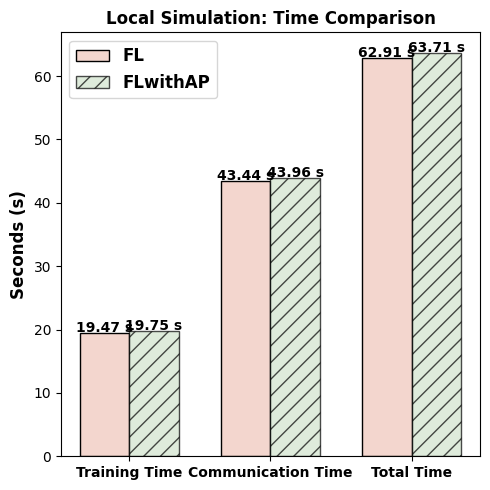

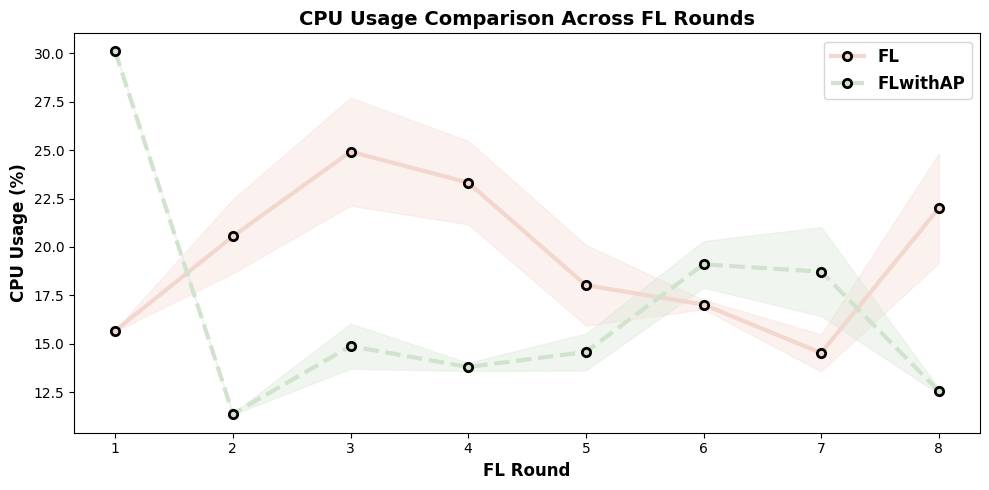

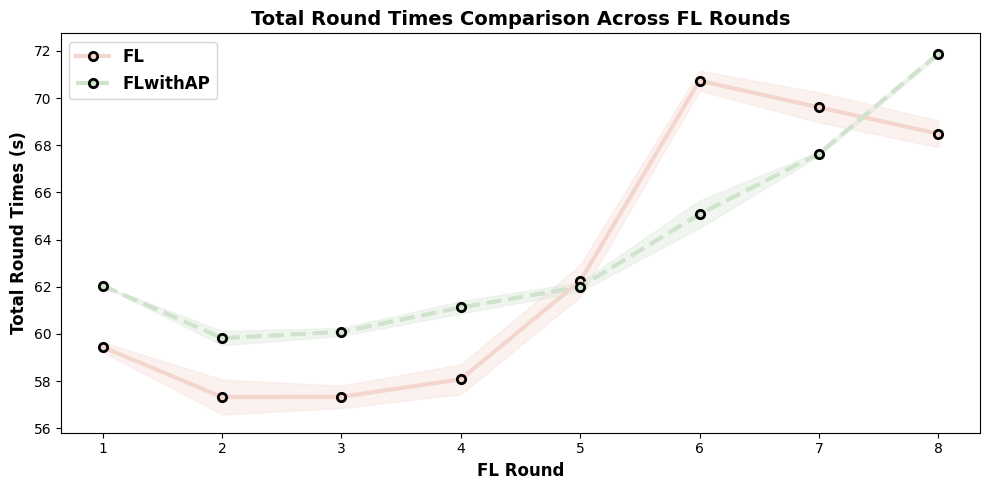

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.backends.backend_pdf import PdfPages

# Load data from CSV files
df_FL = pd.read_csv('FL_performance_metrics.csv')
df_FLwithAP = pd.read_csv('FLwithAP_performance_metrics.csv')

# Extract relevant columns
labels = ['Training Time', 'Communication Time', 'Total Time']
values_FL = [
    df_FL['Training Time'].mean(), 
    df_FL['Communication Time'].mean(), 
    df_FL['Total Time'].mean()
]
values_FLwithAP = [
    df_FLwithAP['Training Time'].mean(), 
    df_FLwithAP['Communication Time'].mean(), 
    df_FLwithAP['Total Time'].mean()
]

# Select only numeric columns for aggregation (excluding 'Client ID')
numeric_cols_FL = df_FL.select_dtypes(include=[np.number]).columns
numeric_cols_FLwithAP = df_FLwithAP.select_dtypes(include=[np.number]).columns

# Calculate mean and standard deviation for each round (only numeric columns)
df_FL_grouped = df_FL.groupby('FL Round')[numeric_cols_FL].agg(['mean', 'std'])  # mean and std for FL
df_FLwithAP_grouped = df_FLwithAP.groupby('FL Round')[numeric_cols_FLwithAP].agg(['mean', 'std'])  # mean and std for FLwithAP

# Bar width for charts
bar_width = 0.35

# Create a PDF file to save all charts
pdf_filename = 'LocalSimulationBenchmark_Full.pdf'
with PdfPages(pdf_filename) as pdf:
    # Bar chart
    fig, axs = plt.subplots(1, 1, figsize=(5, 5))  
    bar_positions = np.arange(len(labels))
    axs.bar(bar_positions - bar_width / 2, values_FL, bar_width, color='#f3d6ce', label='FL', edgecolor='black')
    axs.bar(bar_positions + bar_width / 2, values_FLwithAP, bar_width, color='#d0e3cc', label="FLwithAP", alpha=0.7, edgecolor='black', hatch='//')

    for i, v in enumerate(values_FL):
        axs.text(i - bar_width / 2, v + 0.1, f'{v:.2f} s', color='black', ha='center', weight='bold', fontsize=10)
    for i, v in enumerate(values_FLwithAP):
        axs.text(i + bar_width / 2, v + 0.1, f'{v:.2f} s', color='black', ha='center', weight='bold', fontsize=10)

    axs.set_title('Local Simulation: Time Comparison', weight='bold', fontsize=12)
    axs.set_xticks(bar_positions)
    axs.set_xticklabels(labels, weight='bold', fontsize=10)
    legend = axs.legend(fontsize='large')
    for text in legend.get_texts():
        text.set_fontweight('bold')
    axs.set_ylabel('Seconds (s)', weight='bold', fontsize=12)
    plt.tight_layout()
    pdf.savefig(fig)

    # CPU usage line plot with confidence intervals and no grid background
    fig, ax = plt.subplots(figsize=(10, 5))
    rounds = df_FL_grouped.index
    mean_FL = df_FL_grouped['CPU Usage (%)']['mean']
    std_FL = df_FL_grouped['CPU Usage (%)']['std']
    mean_FLwithAP = df_FLwithAP_grouped['CPU Usage (%)']['mean']
    std_FLwithAP = df_FLwithAP_grouped['CPU Usage (%)']['std']

    # Plot with confidence intervals
    ax.plot(rounds, mean_FL, label='FL', marker='o', color='#f3d6ce', lw=3, mec='black', mew=2)
    ax.fill_between(rounds, mean_FL - std_FL, mean_FL + std_FL, color='#f3d6ce', alpha=0.3)

    ax.plot(rounds, mean_FLwithAP, label='FLwithAP', marker='o', color='#d0e3cc', lw=3, linestyle='--', mec='black', mew=2)
    ax.fill_between(rounds, mean_FLwithAP - std_FLwithAP, mean_FLwithAP + std_FLwithAP, color='#d0e3cc', alpha=0.3)

    # Remove grid
    ax.grid(False)

    ax.set_title('CPU Usage Comparison Across FL Rounds', weight='bold', fontsize=14)
    ax.set_xlabel('FL Round', weight='bold', fontsize=12)
    ax.set_ylabel('CPU Usage (%)', weight='bold', fontsize=12)
    ax.set_xticks(rounds)
    legend = ax.legend(fontsize='large')
    for text in legend.get_texts():
        text.set_fontweight('bold')
    plt.tight_layout()
    pdf.savefig(fig)

    # Total Time line plot with confidence intervals and no grid background
    fig, ax = plt.subplots(figsize=(10, 5))
    mean_FL_total = df_FL_grouped['Total Time']['mean']
    std_FL_total = df_FL_grouped['Total Time']['std']
    mean_FLwithAP_total = df_FLwithAP_grouped['Total Time']['mean']
    std_FLwithAP_total = df_FLwithAP_grouped['Total Time']['std']

    # Plot with confidence intervals
    ax.plot(rounds, mean_FL_total, label='FL', marker='o', color='#f3d6ce', lw=3, mec='black', mew=2)
    ax.fill_between(rounds, mean_FL_total - std_FL_total, mean_FL_total + std_FL_total, color='#f3d6ce', alpha=0.3)

    ax.plot(rounds, mean_FLwithAP_total, label='FLwithAP', marker='o', color='#d0e3cc', lw=3, linestyle='--', mec='black', mew=2)
    ax.fill_between(rounds, mean_FLwithAP_total - std_FLwithAP_total, mean_FLwithAP_total + std_FLwithAP_total, color='#d0e3cc', alpha=0.3)

    # Remove grid
    ax.grid(False)

    ax.set_title('Total Time Comparison Across FL Rounds', weight='bold', fontsize=14)
    ax.set_xlabel('FL Round', weight='bold', fontsize=12)
    ax.set_ylabel('Total Round Time (s)', weight='bold', fontsize=12)
    ax.set_xticks(rounds)
    legend = ax.legend(fontsize='large')
    for text in legend.get_texts():
        text.set_fontweight('bold')
    plt.tight_layout()
    pdf.savefig(fig)
